#IMPORT LIBRARY

In [6]:
## import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report

#READ DATA

In [7]:
df = pd.read_excel('F:\KEDE\Documents\Kuliah\SKRIPSI\projek\Dataset Magang - Data Triage dan ASMED IGD.xlsx')
df.head()

,ID KUNJUNGAN,ID TRIAGE,WAKTU TRIAGE,JAM TRIAGE,HARI TRIAGE,WAKTU REGISTRASI,JAM REGISTRASI,HARI REGISTRASI,KESIMPULAN EMERGENSI,TANGGAL LAHIR,...,PROSEDUR UTAMA,IGD MEDIS AKHIR,TANGGAL PULANG,SELISIH TRIAGE - REGISTRASI (2),SELISIH REGISTRASI - IGD AWAL (2),SELISIH IGD AWAL - IGD AKHIR (2),SELISIH TRIAGE - IGD AWAL (2),SELISIH TRIAGE - IGD AKHIR,TINDAKAN IGD,row_num
0,553320,58199,2023-12-31 20:15:00+00:00,20.0,Sunday,2024-01-01 00:00:00+00:00,0.0,Monday,Kategori 3 - Urgent,2006-07-12 17:00:00+00:00,...,NaN,2024-01-01 04:40:55+00:00,2024-01-01 02:47:00+00:00,225.0,22.0,259.0,247.0,506.0,LAINNYA,1
1,553321,58200,2023-12-31 23:58:00+00:00,23.0,Sunday,2024-01-01 00:06:00+00:00,0.0,Monday,Kategori 3 - Urgent,2003-09-19 00:00:00+00:00,...,99.29 - Injection or infusion of other therape...,2024-01-01 01:08:45+00:00,2024-01-01 01:18:00+00:00,8.0,21.0,41.0,29.0,71.0,MEDICAL,1
2,553322,58201,2023-12-31 23:58:00+00:00,23.0,Sunday,2024-01-01 00:21:00+00:00,0.0,Monday,Kategori 3 - Urgent,1973-05-31 00:00:00+00:00,...,99.29 - Injection or infusion of other therape...,2024-01-01 01:12:33+00:00,2024-01-01 01:15:00+00:00,23.0,24.0,27.0,47.0,75.0,MEDICAL,1
3,553323,58202,2024-01-01 00:42:00+00:00,0.0,Monday,2024-01-01 00:50:00+00:00,0.0,Monday,Kategori 4 - Semi-Urgent,2020-09-07 00:00:00+00:00,...,99.29 - Injection or infusion of other therape...,2024-01-01 01:44:52+00:00,2024-01-01 01:55:00+00:00,8.0,2.0,53.0,10.0,63.0,MEDICAL,1
4,553326,58203,2024-01-01 00:55:00+00:00,0.0,Monday,2024-01-01 01:10:00+00:00,1.0,Monday,Kategori 3 - Urgent,1965-05-15 00:00:00+00:00,...,99.2 - Injection or infusion of other therapeu...,2024-01-01 02:26:10+00:00,2024-01-01 02:20:00+00:00,15.0,35.0,41.0,50.0,91.0,MEDICAL,1


#PREPOCESSING

In [8]:
columns_to_drop = ['ID KUNJUNGAN', 'keluhan_utama', 'riwayat_kesehatan_saat_ini', 'row_num', 'ID TRIAGE', 'pemeriksaan_fisik', 'HARI TRIAGE', 'JAM REGISTRASI', 'HARI REGISTRASI', 'DPJP AWAL', 'DPJP AKHIR', 'ASURANSI', 'IGD MEDIS AWAL', 'diagnosa', 'DIAGNOSA UTAMA', 'SELISIH TRIAGE - REGISTRASI (2)', 'SELISIH REGISTRASI - IGD AWAL (2)', 'SELISIH IGD AWAL - IGD AKHIR (2)', 'SELISIH TRIAGE - IGD AWAL (2)', 'SELISIH TRIAGE - IGD AKHIR', 'TINDAKAN IGD', 'KETERANGAN ASESMEN', 'DIAGNOSA SEKUNDER', 'PROSEDUR UTAMA', 'IGD MEDIS AKHIR', 'TANGGAL PULANG']

df = df.drop(columns=columns_to_drop)

df.head(2500)

,WAKTU TRIAGE,JAM TRIAGE,WAKTU REGISTRASI,KESIMPULAN EMERGENSI,TANGGAL LAHIR,umur,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,ttv,gcs
0,2023-12-31 20:15:00+00:00,20.0,2024-01-01 00:00:00+00:00,Kategori 3 - Urgent,2006-07-12 17:00:00+00:00,19 th 6 bl 30 hr,15 - 25 Tahun,PEREMPUAN,NON JKN,Rawat Inap,sistolik : 113 \ndiastolik : 83 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
1,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:06:00+00:00,Kategori 3 - Urgent,2003-09-19 00:00:00+00:00,20 th 3 bl 13 hr,15 - 25 Tahun,PEREMPUAN,JKN,Pengobatan Selesai,sistolik : 125 \ndiastolik : 70 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
2,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:21:00+00:00,Kategori 3 - Urgent,1973-05-31 00:00:00+00:00,50 th 7 bl 1 hr,45 - 64 Tahun,Laki-Laki,JKN,Pengobatan Selesai,sistolik : 140 \ndiastolik : 85 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
3,2024-01-01 00:42:00+00:00,0.0,2024-01-01 00:50:00+00:00,Kategori 4 - Semi-Urgent,2020-09-07 00:00:00+00:00,3 th 3 bl 25 hr,1 - 4 Tahun,PEREMPUAN,JKN,Pengobatan Selesai,sistolik : - \ndiastolik : - \npernapasan : 24...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...
4,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:10:00+00:00,Kategori 3 - Urgent,1965-05-15 00:00:00+00:00,58 th 7 bl 17 hr,45 - 64 Tahun,Laki-Laki,JKN,Pengobatan Selesai,sistolik : 81 \ndiastolik : 60 \npernapasan : ...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2024-01-30 21:45:00+00:00,21.0,2024-01-30 22:28:00+00:00,Kategori 3 - Urgent,1989-11-26 00:00:00+00:00,34 th 2 bl 4 hr,26 - 44 Tahun,PEREMPUAN,JKN,Pengobatan Selesai,sistolik : 154 \ndiastolik : 90 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
2496,2024-01-30 21:45:00+00:00,21.0,2024-01-30 22:34:00+00:00,Kategori 4 - Semi-Urgent,2012-12-29 00:00:00+00:00,11 th 1 bl 1 hr,5 - 14 Tahun,PEREMPUAN,JKN,Rawat Inap,sistolik : - \ndiastolik : - \npernapasan : 25...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
2497,2024-01-30 21:45:00+00:00,21.0,2024-01-30 22:44:00+00:00,Kategori 4 - Semi-Urgent,2021-09-06 00:00:00+00:00,2 th 4 bl 24 hr,1 - 4 Tahun,PEREMPUAN,JKN,Pengobatan Selesai,sistolik : 00 \ndiastolik : 00 \npernapasan : ...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...
2498,2024-01-30 21:45:00+00:00,21.0,2024-01-30 22:48:00+00:00,Kategori 3 - Urgent,1967-02-09 00:00:00+00:00,56 th 11 bl 21 hr,45 - 64 Tahun,Laki-Laki,JKN,Rawat Inap,sistolik : 120 \ndiastolik : 97 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...


In [9]:
df.shape

(26705, 12)

In [10]:
df.isnull().sum()

WAKTU TRIAGE                 3
JAM TRIAGE                   3
WAKTU REGISTRASI             0
KESIMPULAN EMERGENSI       175
TANGGAL LAHIR                0
umur                         0
KATEGORI UMUR                0
JENIS KELAMIN                0
STATUS JKN                   0
Tindak Lanjut Akhir Igd      0
ttv                          0
gcs                          0
dtype: int64

In [11]:
df.shape

(26705, 12)

In [12]:
#df['KODE DIAGNOSA'] = df['DIAGNOSA UTAMA'].str.extract(r'([A-Z])\d+')

In [13]:
unique_hari_triage = df['Tindak Lanjut Akhir Igd'].unique()
print(unique_hari_triage)

['Rawat Inap' 'Pengobatan Selesai' 'APS' 'Rujuk Eksternal' 'Meninggal'
 'Lanjut Observasi']


In [14]:
unique_hari_triagea= df['KATEGORI UMUR'].unique()
print(unique_hari_triagea)

['15 - 25 Tahun' '45 - 64 Tahun' '1 - 4 Tahun' '26 - 44 Tahun'
 '>= 65 Tahun' '5 - 14 Tahun' '29 Hari - < 1 Tahun' '0 - 6 Hari'
 '7 - 28 Hari']


In [15]:
unique_hari_triageb= df['STATUS JKN'].unique()
print(unique_hari_triageb)

['NON JKN' 'JKN']


In [16]:
unique_hari_triageD= df['KESIMPULAN EMERGENSI'].unique()
print(unique_hari_triageD)

['Kategori 3 - Urgent' 'Kategori 4 - Semi-Urgent' 'Kategori 2 - Emergensi'
 'Kategori 1 - Resusitasi' nan 'Kategori 5 - Non-Urgent']


In [17]:
unique_hari_triagee= df['JAM TRIAGE'].unique()
print(unique_hari_triagee)

[20. 23.  0.  6.  5.  7.  8. 11. 14. 15. 17. 19. 21. 22.  1. 10. 12. 13.
  3.  9. 18.  2.  4. 16. nan]


In [18]:
#unique_hari_triagef= df['KODE DIAGNOSA'].unique()
#print(unique_hari_triagef)

In [19]:
df['JENIS KELAMIN'] = df['JENIS KELAMIN'].replace({
    'PEREMPUAN': 0,
    'Laki-Laki': 1,
})

df['KATEGORI UMUR'] = df['KATEGORI UMUR'].replace({
    '0 - 6 Hari': 0,
    '7 - 28 Hari': 1,
    '29 Hari - < 1 Tahun': 2,
    '1 - 4 Tahun': 3,
    '5 - 14 Tahun': 4,
    '15 - 25 Tahun': 5,
    '26 - 44 Tahun': 6,
    '45 - 64 Tahun': 7,
    '>= 65 Tahun': 8
})

df['Tindak Lanjut Akhir Igd'] = df['Tindak Lanjut Akhir Igd'].replace({
    'Pengobatan Selesai': 0,
    'Rawat Inap': 1,
    'APS': 0,
    'Rujuk Eksternal': 0,
    'Lanjut Observasi': 0,
    'Meninggal': 0,
})

df['STATUS JKN'] = df['STATUS JKN'].replace({
    'NON JKN': 0,
    'JKN': 1,
})

df['KESIMPULAN EMERGENSI'] = df['KESIMPULAN EMERGENSI'].replace({
    'Kategori 4 - Semi-Urgent': 3,
    'Kategori 3 - Urgent': 2,
    'Kategori 2 - Emergensi': 1,
    'Kategori 1 - Resusitasi': 0,
    'Kategori 5 - Non-Urgent': 4,
})

 # df.loc[df['JAM TRIAGE'] == 0.1, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 1, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 2, 'JAM TRIAGE'] = 3
 # df.loc[df['JAM TRIAGE'] == 3, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 4, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 5, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 6, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 7, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 8, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 9, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 10.1, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 11, 'JAM TRIAGE'] = 1
  #df.loc[df['JAM TRIAGE'] == 12, 'JAM TRIAGE'] = 1
  #df.loc[df['JAM TRIAGE'] == 13, 'JAM TRIAGE'] = 1
  #df.loc[df['JAM TRIAGE'] == 14, 'JAM TRIAGE'] = 1
  #df.loc[df['JAM TRIAGE'] == 15, 'JAM TRIAGE'] = 2
  #df.loc[df['JAM TRIAGE'] == 16, 'JAM TRIAGE'] = 2
  #df.loc[df['JAM TRIAGE'] == 17, 'JAM TRIAGE'] = 2
  #df.loc[df['JAM TRIAGE'] == 18, 'JAM TRIAGE'] = 2
  #df.loc[df['JAM TRIAGE'] == 19, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 20.1, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 21, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 22, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 23, 'JAM TRIAGE'] = 3

#df['KODE DIAGNOSA'] = df['KODE DIAGNOSA'].replace({
 #   'A': 0,
  #  'B': 0,
  #  'C': 1,
  #  'D': 2,
  #  'E': 3,
  #  'F': 4,
  #  'G': 5,
  #  'H': 6,
  #  'I': 7,
  #  'J': 8,
  #  'K': 9,
  #  'L': 10,
  #  'M': 11,
  #  'N': 12,
  #  'O': 13,
  #  'P': 14,
  #  'Q': 15,
  #  'R': 16,
  #  'S': 17,
  #  'T': 17,
  #  'Y': 18,
  #  'Z': 19,
#})

df.head(10)

,WAKTU TRIAGE,JAM TRIAGE,WAKTU REGISTRASI,KESIMPULAN EMERGENSI,TANGGAL LAHIR,umur,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,ttv,gcs
0,2023-12-31 20:15:00+00:00,20.0,2024-01-01 00:00:00+00:00,2.0,2006-07-12 17:00:00+00:00,19 th 6 bl 30 hr,5,0,0,1,sistolik : 113 \ndiastolik : 83 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
1,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:06:00+00:00,2.0,2003-09-19 00:00:00+00:00,20 th 3 bl 13 hr,5,0,1,0,sistolik : 125 \ndiastolik : 70 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
2,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:21:00+00:00,2.0,1973-05-31 00:00:00+00:00,50 th 7 bl 1 hr,7,1,1,0,sistolik : 140 \ndiastolik : 85 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
3,2024-01-01 00:42:00+00:00,0.0,2024-01-01 00:50:00+00:00,3.0,2020-09-07 00:00:00+00:00,3 th 3 bl 25 hr,3,0,1,0,sistolik : - \ndiastolik : - \npernapasan : 24...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...
4,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:10:00+00:00,2.0,1965-05-15 00:00:00+00:00,58 th 7 bl 17 hr,7,1,1,0,sistolik : 81 \ndiastolik : 60 \npernapasan : ...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
5,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:45:00+00:00,2.0,1995-02-20 00:00:00+00:00,28 th 10 bl 12 hr,6,1,1,0,sistolik : 145 \ndiastolik : 87 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
6,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:50:00+00:00,2.0,2021-12-02 00:00:00+00:00,2 th 0 bl 30 hr,3,1,1,0,sistolik : - \ndiastolik : - \npernapasan : 23...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...
7,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:52:00+00:00,2.0,2019-12-28 00:00:00+00:00,4 th 0 bl 4 hr,3,0,1,0,sistolik : - \ndiastolik : - \npernapasan : 23...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...
8,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:23:00+00:00,2.0,1996-10-04 00:00:00+00:00,27 th 2 bl 28 hr,6,0,1,0,sistolik : 110 \ndiastolik : 70 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
9,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:39:00+00:00,2.0,2022-09-05 00:00:00+00:00,1 th 3 bl 27 hr,3,0,1,1,sistolik : - \ndiastolik : - \npernapasan : 34...,gcs : Bayi 0-23 Bulan\nskor_gcs : 0465 Bayi 0-...


In [20]:
import re

def extract_ttv(text):
    """Mengekstrak nilai sistolik dan diastolik dari teks TTV."""
    sistolik_match = re.search(r"sistolik\s*:\s*(\d+)", text, re.IGNORECASE)
    diastolik_match = re.search(r"diastolik\s*:\s*(\d+)", text, re.IGNORECASE)
    pernapasan_match = re.search(r"pernapasan\s*:\s*(\d+)", text, re.IGNORECASE)
    suhu_match = re.search(r"suhu\s*:\s*(\d+\.\d+)", text, re.IGNORECASE)
    nadi_match = re.search(r"nadi\s*:\s*(\d+)", text, re.IGNORECASE)
    saturasi_oksigen_match = re.search(r"saturasi_oksigen\s*:\s*(\d+)", text, re.IGNORECASE)
    skala_nyeri_match = re.search(r"skala_nyeri\s*:\s*(\d+)", text, re.IGNORECASE)
    s_match = re.search(r"S\s*:\s*(\d+)", text, re.IGNORECASE)
   # gcs_match = re.search(r"skor_gcs\s*:\s*(\d+)", text, re.IGNORECASE)

    sistolik = int(sistolik_match.group(1)) if sistolik_match else None
    diastolik = int(diastolik_match.group(1)) if diastolik_match else None
    pernapasan = int(pernapasan_match.group(1)) if pernapasan_match else None
    suhu = float(suhu_match.group(1)) if suhu_match else None
    nadi = int(nadi_match.group(1)) if nadi_match else None
    saturasi_oksigen = int(saturasi_oksigen_match.group(1)) if saturasi_oksigen_match else None
    skala_nyeri = int(skala_nyeri_match.group(1)) if skala_nyeri_match else None
    s = int(s_match.group(1)) if s_match else None
    #gcsa = int(s_match.group(1)) if gcs_match else None

    return sistolik, diastolik, pernapasan, suhu, nadi, saturasi_oksigen, skala_nyeri, s

df[['sistolik', 'diastolik', 'pernapasan', 'suhu', 'nadi', 'saturasi_oksigen', 'skala_nyeri', 's']] = df['ttv'].apply(lambda x: pd.Series(extract_ttv(x)))

In [21]:
import re
def extract_gcs(text):
    """Mengekstrak nilai GCS dari teks GCS."""
    gcsa_match = re.search(r"skor_gcs\s*:\s*(\d+)", text, re.IGNORECASE)

    return int(gcsa_match.group(1)) if gcsa_match else None

df['gcsa'] = df['gcs'].apply(extract_gcs)

In [22]:
empty_rows = df['gcsa'].isnull()
df.drop(df[empty_rows].index, inplace=True)

df.head(10)

,WAKTU TRIAGE,JAM TRIAGE,WAKTU REGISTRASI,KESIMPULAN EMERGENSI,TANGGAL LAHIR,umur,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,...,gcs,sistolik,diastolik,pernapasan,suhu,nadi,saturasi_oksigen,skala_nyeri,s,gcsa
0,2023-12-31 20:15:00+00:00,20.0,2024-01-01 00:00:00+00:00,2.0,2006-07-12 17:00:00+00:00,19 th 6 bl 30 hr,5,0,0,1,...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...,113.0,83.0,22.0,40.1,121.0,98.0,NaN,7.0,465
1,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:06:00+00:00,2.0,2003-09-19 00:00:00+00:00,20 th 3 bl 13 hr,5,0,1,0,...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...,125.0,70.0,20.0,36.5,87.0,99.0,NaN,7.0,465
2,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:21:00+00:00,2.0,1973-05-31 00:00:00+00:00,50 th 7 bl 1 hr,7,1,1,0,...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...,140.0,85.0,20.0,36.7,96.0,98.0,NaN,8.0,465
3,2024-01-01 00:42:00+00:00,0.0,2024-01-01 00:50:00+00:00,3.0,2020-09-07 00:00:00+00:00,3 th 3 bl 25 hr,3,0,1,0,...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...,NaN,NaN,24.0,39.1,105.0,98.0,0.0,NaN,465
4,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:10:00+00:00,2.0,1965-05-15 00:00:00+00:00,58 th 7 bl 17 hr,7,1,1,0,...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...,81.0,60.0,27.0,36.5,96.0,98.0,NaN,7.0,465
5,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:45:00+00:00,2.0,1995-02-20 00:00:00+00:00,28 th 10 bl 12 hr,6,1,1,0,...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...,145.0,87.0,22.0,36.7,72.0,99.0,0.0,NaN,465
6,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:50:00+00:00,2.0,2021-12-02 00:00:00+00:00,2 th 0 bl 30 hr,3,1,1,0,...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...,NaN,NaN,23.0,37.1,125.0,98.0,0.0,NaN,465
7,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:52:00+00:00,2.0,2019-12-28 00:00:00+00:00,4 th 0 bl 4 hr,3,0,1,0,...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...,NaN,NaN,23.0,36.1,135.0,98.0,NaN,7.0,465
8,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:23:00+00:00,2.0,1996-10-04 00:00:00+00:00,27 th 2 bl 28 hr,6,0,1,0,...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...,110.0,70.0,20.0,36.7,79.0,97.0,NaN,7.0,465
9,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:39:00+00:00,2.0,2022-09-05 00:00:00+00:00,1 th 3 bl 27 hr,3,0,1,1,...,gcs : Bayi 0-23 Bulan\nskor_gcs : 0465 Bayi 0-...,NaN,NaN,34.0,36.5,122.0,96.0,0.0,NaN,465


In [23]:
df['gcsa'] = df['gcsa'].astype(str)
df['gcsa_str'] = df['gcsa'].astype(str)
#Now use df['gcsa_str'] for string operations.
# Filter baris dengan 3 digit di kolom 'gcsa'
df = df[df['gcsa_str'].str.len() == 3]

df.isnull().sum()

WAKTU TRIAGE                   2
JAM TRIAGE                     2
WAKTU REGISTRASI               0
KESIMPULAN EMERGENSI         159
TANGGAL LAHIR                  0
umur                           0
KATEGORI UMUR                  0
JENIS KELAMIN                  0
STATUS JKN                     0
Tindak Lanjut Akhir Igd        0
ttv                            0
gcs                            0
sistolik                    3451
diastolik                   3450
pernapasan                     0
suhu                        3033
nadi                           0
saturasi_oksigen               0
skala_nyeri                15791
s                           9263
gcsa                           0
gcsa_str                       0
dtype: int64

In [24]:
df['gcsa'] = df['gcsa'].astype(str)
df['eye'] = df['gcsa'].str[0].astype(int)
df['motorik'] = df['gcsa'].str[1].astype(int)
df['verbal'] = df['gcsa'].str[2].astype(int)

In [25]:
df.head(10)

,WAKTU TRIAGE,JAM TRIAGE,WAKTU REGISTRASI,KESIMPULAN EMERGENSI,TANGGAL LAHIR,umur,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,...,suhu,nadi,saturasi_oksigen,skala_nyeri,s,gcsa,gcsa_str,eye,motorik,verbal
0,2023-12-31 20:15:00+00:00,20.0,2024-01-01 00:00:00+00:00,2.0,2006-07-12 17:00:00+00:00,19 th 6 bl 30 hr,5,0,0,1,...,40.1,121.0,98.0,NaN,7.0,465,465,4,6,5
1,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:06:00+00:00,2.0,2003-09-19 00:00:00+00:00,20 th 3 bl 13 hr,5,0,1,0,...,36.5,87.0,99.0,NaN,7.0,465,465,4,6,5
2,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:21:00+00:00,2.0,1973-05-31 00:00:00+00:00,50 th 7 bl 1 hr,7,1,1,0,...,36.7,96.0,98.0,NaN,8.0,465,465,4,6,5
3,2024-01-01 00:42:00+00:00,0.0,2024-01-01 00:50:00+00:00,3.0,2020-09-07 00:00:00+00:00,3 th 3 bl 25 hr,3,0,1,0,...,39.1,105.0,98.0,0.0,NaN,465,465,4,6,5
4,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:10:00+00:00,2.0,1965-05-15 00:00:00+00:00,58 th 7 bl 17 hr,7,1,1,0,...,36.5,96.0,98.0,NaN,7.0,465,465,4,6,5
5,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:45:00+00:00,2.0,1995-02-20 00:00:00+00:00,28 th 10 bl 12 hr,6,1,1,0,...,36.7,72.0,99.0,0.0,NaN,465,465,4,6,5
6,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:50:00+00:00,2.0,2021-12-02 00:00:00+00:00,2 th 0 bl 30 hr,3,1,1,0,...,37.1,125.0,98.0,0.0,NaN,465,465,4,6,5
7,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:52:00+00:00,2.0,2019-12-28 00:00:00+00:00,4 th 0 bl 4 hr,3,0,1,0,...,36.1,135.0,98.0,NaN,7.0,465,465,4,6,5
8,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:23:00+00:00,2.0,1996-10-04 00:00:00+00:00,27 th 2 bl 28 hr,6,0,1,0,...,36.7,79.0,97.0,NaN,7.0,465,465,4,6,5
9,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:39:00+00:00,2.0,2022-09-05 00:00:00+00:00,1 th 3 bl 27 hr,3,0,1,1,...,36.5,122.0,96.0,0.0,NaN,465,465,4,6,5


In [26]:
df['WAKTU TRIAGE'] = pd.to_datetime(df['WAKTU TRIAGE'])
df['WAKTU REGISTRASI'] = pd.to_datetime(df['WAKTU REGISTRASI'])
df['WAKTU TUNGGU'] = (df['WAKTU REGISTRASI'] - df['WAKTU TRIAGE']).dt.total_seconds() / 60

In [27]:
print(df['JAM TRIAGE'].dtype)

float64


In [28]:
for index, row in df.iterrows():
    # Periksa apakah kolom 's' memiliki nilai (selain NaN)
    if pd.notna(row['s']):
        # Ganti nilai pada kolom 'skala_nyeri' dengan nilai dari kolom 's'
        df.loc[index, 'skala_nyeri'] = row['s']

df.loc[df['skala_nyeri'] > 10, 'skala_nyeri'] = 0

In [29]:
condition = df['skala_nyeri'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [30]:
df.head(10)

,WAKTU TRIAGE,JAM TRIAGE,WAKTU REGISTRASI,KESIMPULAN EMERGENSI,TANGGAL LAHIR,umur,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,...,nadi,saturasi_oksigen,skala_nyeri,s,gcsa,gcsa_str,eye,motorik,verbal,WAKTU TUNGGU
0,2023-12-31 20:15:00+00:00,20.0,2024-01-01 00:00:00+00:00,2.0,2006-07-12 17:00:00+00:00,19 th 6 bl 30 hr,5,0,0,1,...,121.0,98.0,7.0,7.0,465,465,4,6,5,225.0
1,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:06:00+00:00,2.0,2003-09-19 00:00:00+00:00,20 th 3 bl 13 hr,5,0,1,0,...,87.0,99.0,7.0,7.0,465,465,4,6,5,8.0
2,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:21:00+00:00,2.0,1973-05-31 00:00:00+00:00,50 th 7 bl 1 hr,7,1,1,0,...,96.0,98.0,8.0,8.0,465,465,4,6,5,23.0
3,2024-01-01 00:42:00+00:00,0.0,2024-01-01 00:50:00+00:00,3.0,2020-09-07 00:00:00+00:00,3 th 3 bl 25 hr,3,0,1,0,...,105.0,98.0,0.0,NaN,465,465,4,6,5,8.0
4,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:10:00+00:00,2.0,1965-05-15 00:00:00+00:00,58 th 7 bl 17 hr,7,1,1,0,...,96.0,98.0,7.0,7.0,465,465,4,6,5,15.0
5,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:45:00+00:00,2.0,1995-02-20 00:00:00+00:00,28 th 10 bl 12 hr,6,1,1,0,...,72.0,99.0,0.0,NaN,465,465,4,6,5,50.0
6,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:50:00+00:00,2.0,2021-12-02 00:00:00+00:00,2 th 0 bl 30 hr,3,1,1,0,...,125.0,98.0,0.0,NaN,465,465,4,6,5,55.0
7,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:52:00+00:00,2.0,2019-12-28 00:00:00+00:00,4 th 0 bl 4 hr,3,0,1,0,...,135.0,98.0,7.0,7.0,465,465,4,6,5,57.0
8,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:23:00+00:00,2.0,1996-10-04 00:00:00+00:00,27 th 2 bl 28 hr,6,0,1,0,...,79.0,97.0,7.0,7.0,465,465,4,6,5,88.0
9,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:39:00+00:00,2.0,2022-09-05 00:00:00+00:00,1 th 3 bl 27 hr,3,0,1,1,...,122.0,96.0,0.0,NaN,465,465,4,6,5,104.0


In [31]:
unique_hari_triagee= df['skala_nyeri'].unique()
print(unique_hari_triagee)

[ 7.  8.  0.  5.  6.  4.  3.  9.  2.  1. 10.]


In [32]:
#unique_hari_triagef= df['KODE DIAGNOSA'].unique()
#print(unique_hari_triagef)

In [33]:
columns_to_drop = ['WAKTU TRIAGE', 'gcsa', 'gcsa_str', 'JAM TRIAGE', 'WAKTU TUNGGU', 'KESIMPULAN EMERGENSI',	'WAKTU REGISTRASI', 'TANGGAL LAHIR',	'umur', 'ttv', 's', 'gcs']

df = df.drop(columns=columns_to_drop)

df.head(2500)

,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,sistolik,diastolik,pernapasan,suhu,nadi,saturasi_oksigen,skala_nyeri,eye,motorik,verbal
0,5,0,0,1,113.0,83.0,22.0,40.1,121.0,98.0,7.0,4,6,5
1,5,0,1,0,125.0,70.0,20.0,36.5,87.0,99.0,7.0,4,6,5
2,7,1,1,0,140.0,85.0,20.0,36.7,96.0,98.0,8.0,4,6,5
3,3,0,1,0,NaN,NaN,24.0,39.1,105.0,98.0,0.0,4,6,5
4,7,1,1,0,81.0,60.0,27.0,36.5,96.0,98.0,7.0,4,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,3,0,1,0,0.0,0.0,24.0,39.2,148.0,98.0,0.0,6,4,4
2693,7,1,1,1,130.0,77.0,22.0,36.5,90.0,98.0,7.0,4,6,5
2694,6,1,1,0,100.0,71.0,22.0,38.8,80.0,98.0,7.0,4,6,5
2695,7,0,1,1,128.0,72.0,21.0,36.5,119.0,97.0,7.0,4,6,5


In [34]:
dfa = df.copy()

In [35]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # Kamu bisa menyesuaikan jumlah tetangga (n_neighbors)
dfa_imputed = imputer.fit_transform(dfa)

In [36]:
dfa_imputed = pd.DataFrame(dfa_imputed, columns=dfa.columns)  # Jika belum diubah ke DataFrame
null_counts = dfa_imputed.isnull().sum()
print(null_counts)

KATEGORI UMUR              0
JENIS KELAMIN              0
STATUS JKN                 0
Tindak Lanjut Akhir Igd    0
sistolik                   0
diastolik                  0
pernapasan                 0
suhu                       0
nadi                       0
saturasi_oksigen           0
skala_nyeri                0
eye                        0
motorik                    0
verbal                     0
dtype: int64


In [37]:
df.isnull().sum()

KATEGORI UMUR                 0
JENIS KELAMIN                 0
STATUS JKN                    0
Tindak Lanjut Akhir Igd       0
sistolik                   3451
diastolik                  3450
pernapasan                    0
suhu                       3033
nadi                          0
saturasi_oksigen              0
skala_nyeri                   0
eye                           0
motorik                       0
verbal                        0
dtype: int64

In [38]:
df.dropna(inplace=True)
df.isnull().sum()

KATEGORI UMUR              0
JENIS KELAMIN              0
STATUS JKN                 0
Tindak Lanjut Akhir Igd    0
sistolik                   0
diastolik                  0
pernapasan                 0
suhu                       0
nadi                       0
saturasi_oksigen           0
skala_nyeri                0
eye                        0
motorik                    0
verbal                     0
dtype: int64

In [39]:
print(df['Tindak Lanjut Akhir Igd'].value_counts(normalize=True) * 100)

Tindak Lanjut Akhir Igd
0    59.6255
1    40.3745
Name: proportion, dtype: float64


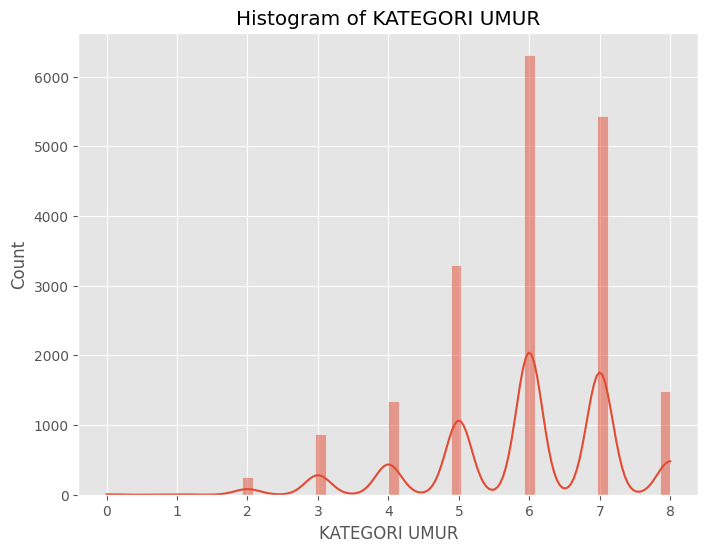

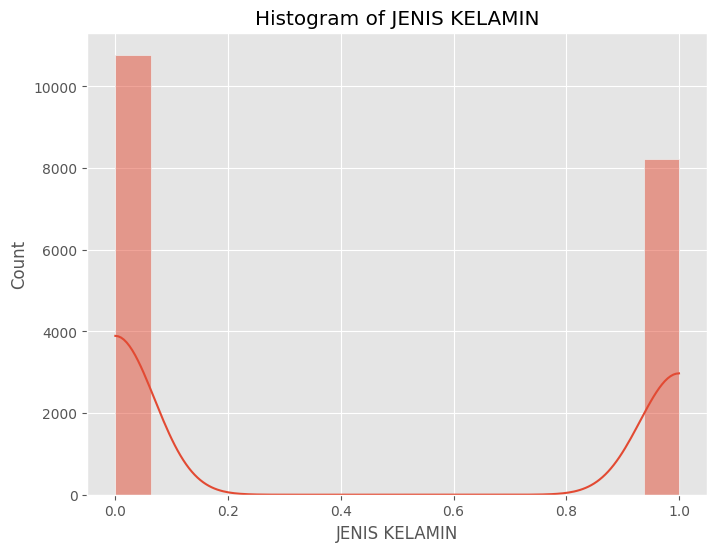

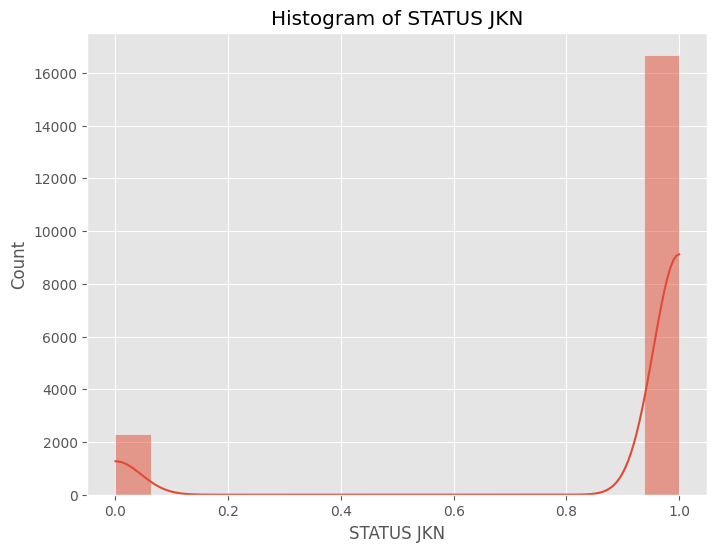

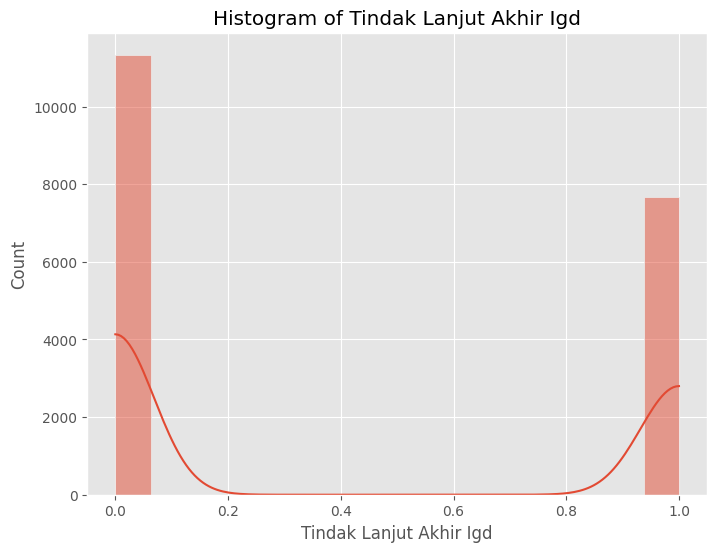

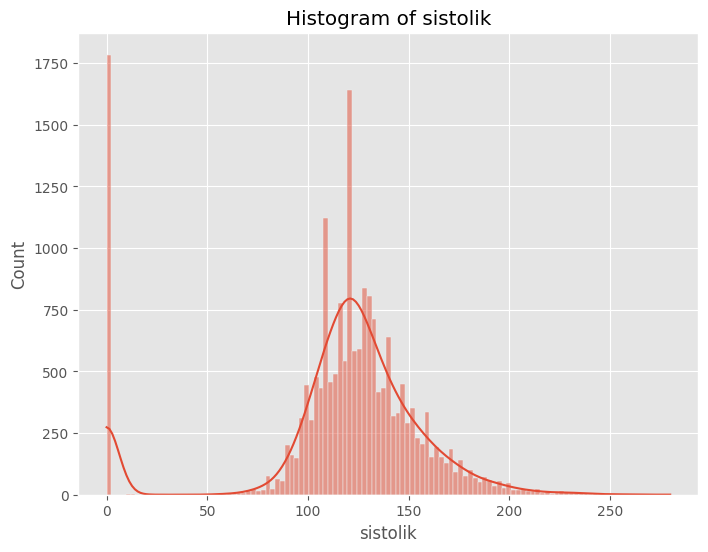

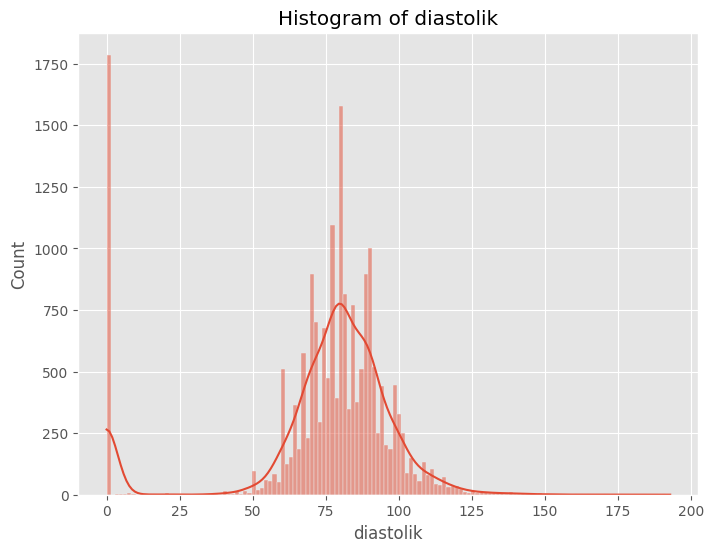

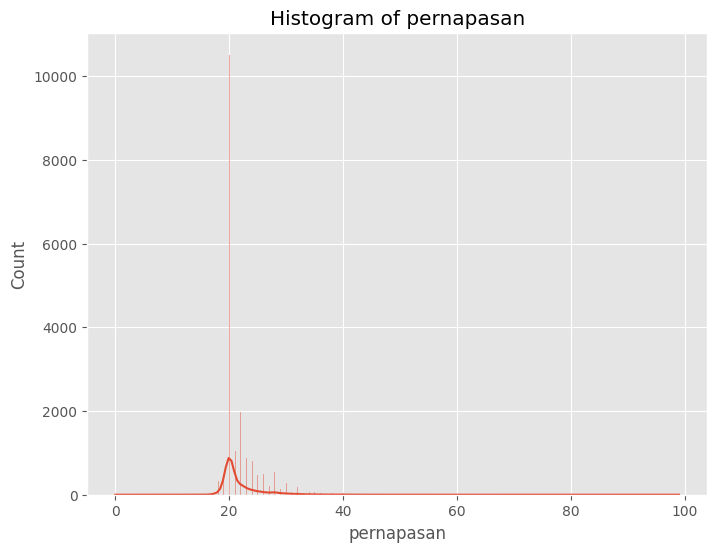

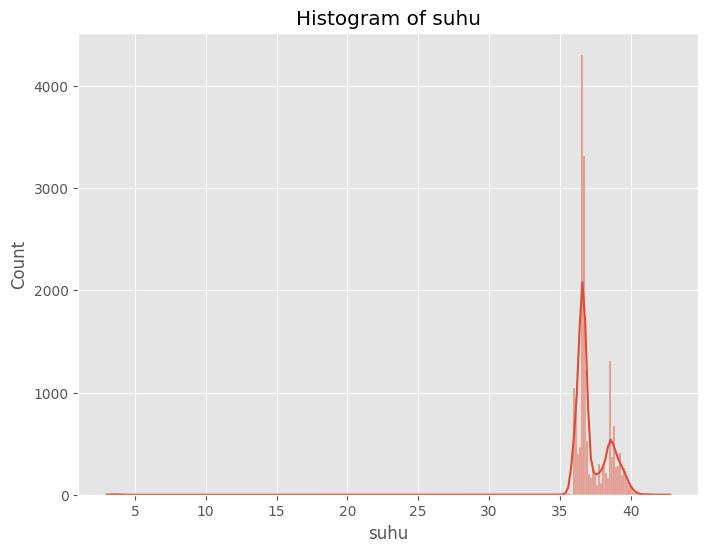

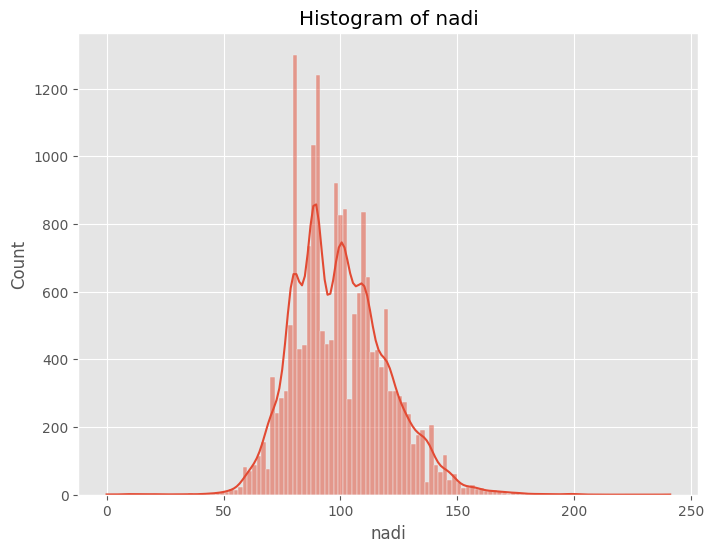

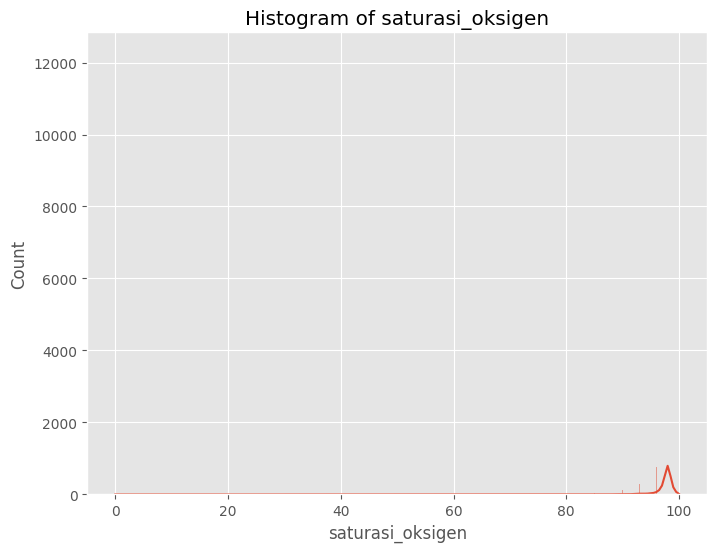

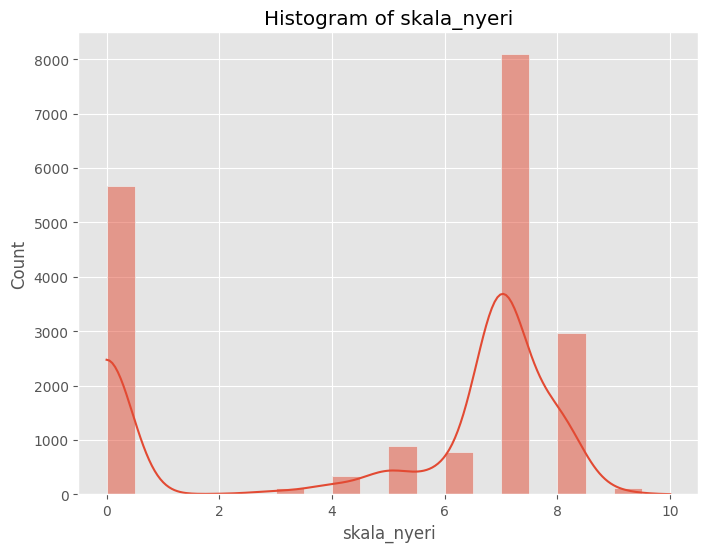

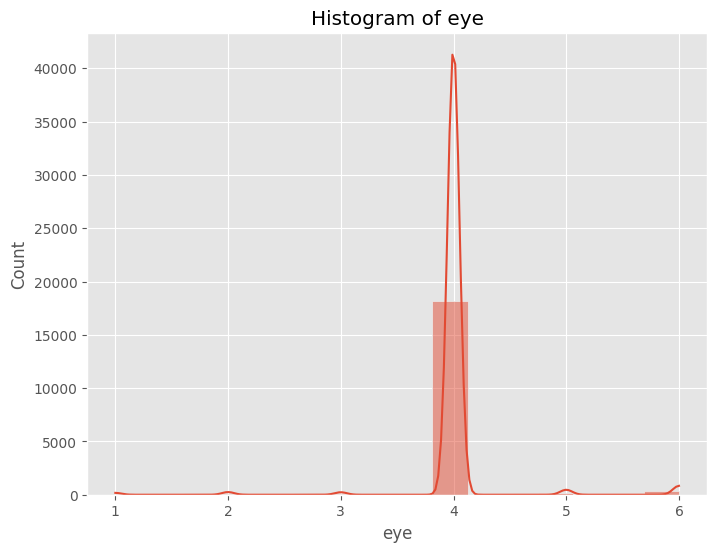

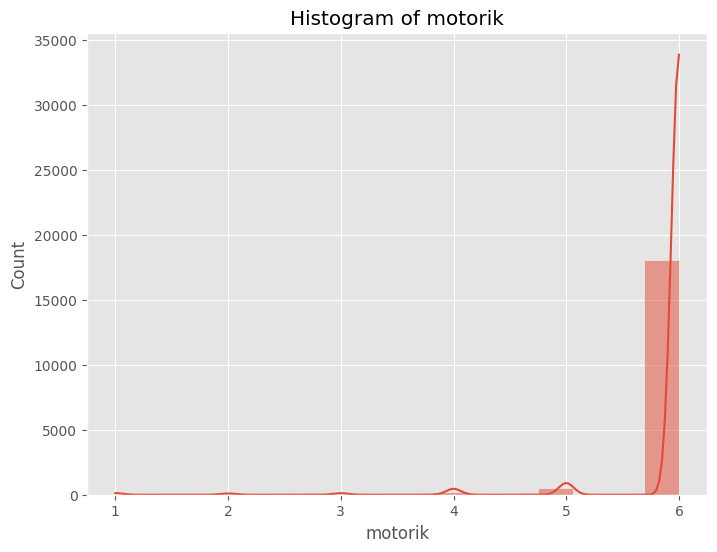

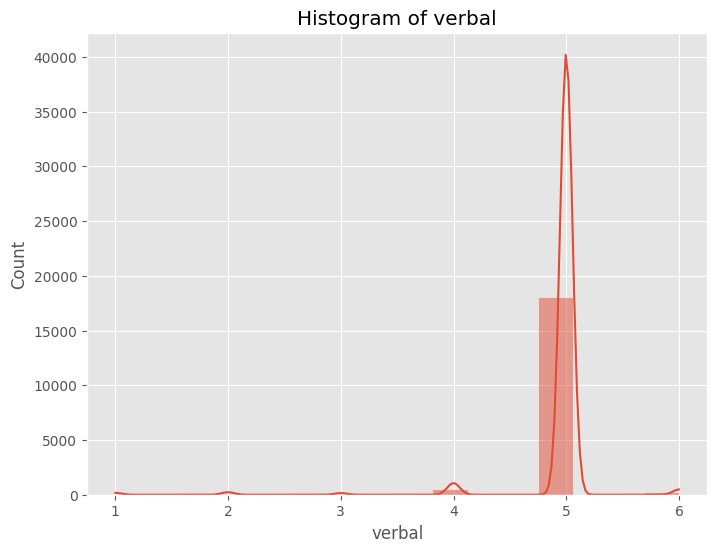

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.select_dtypes(include=np.number).columns:
   plt.figure(figsize=(8, 6))
   sns.histplot(df[column], kde=True)
   plt.title(f'Histogram of {column}')
   plt.show()

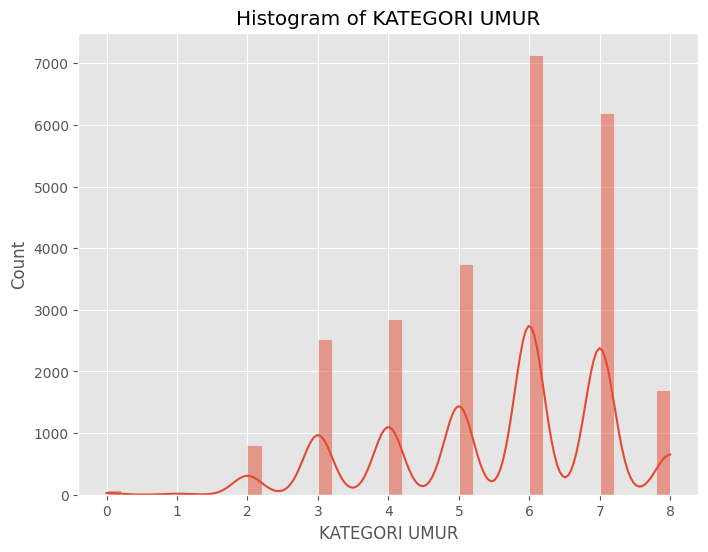

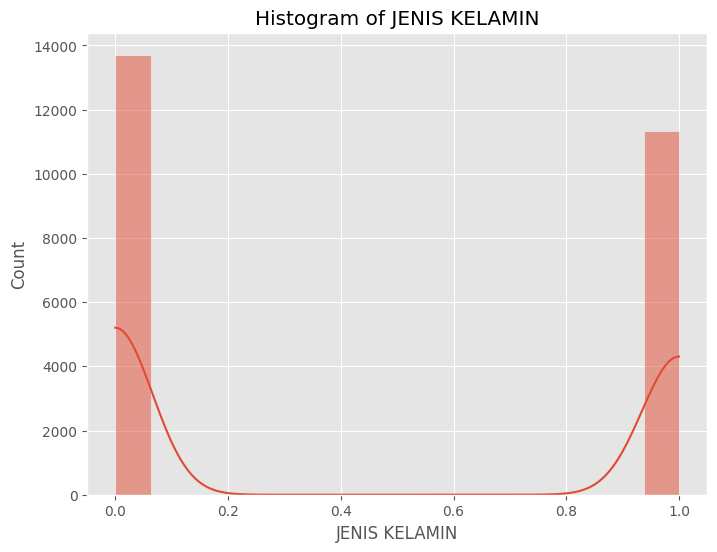

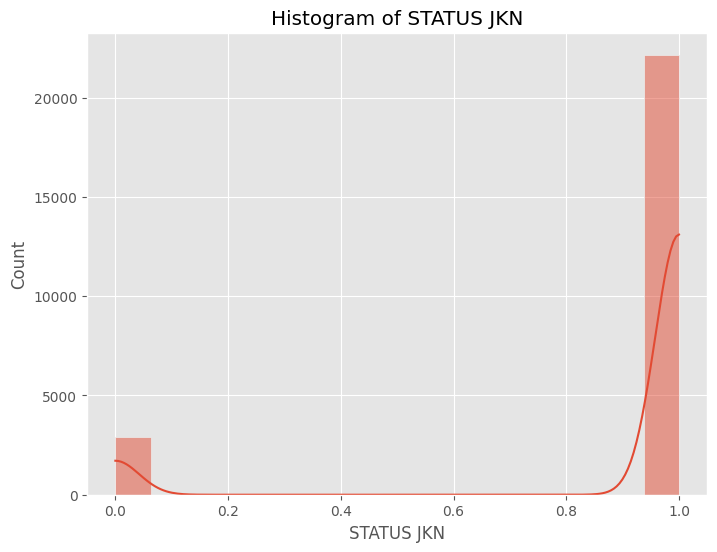

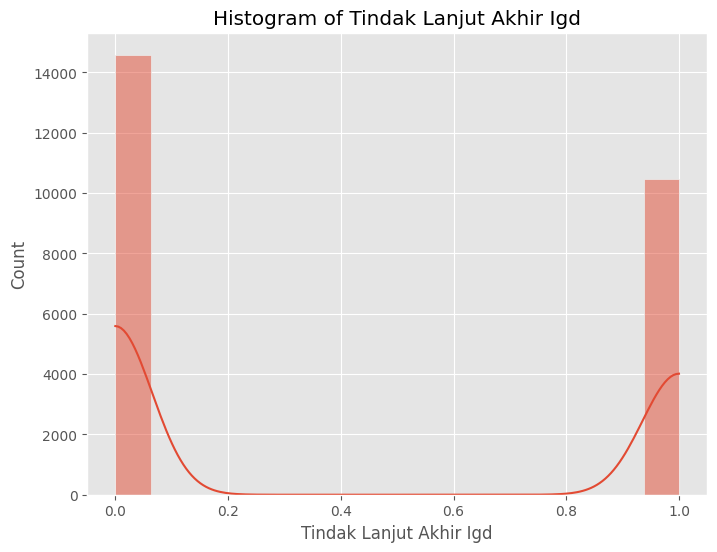

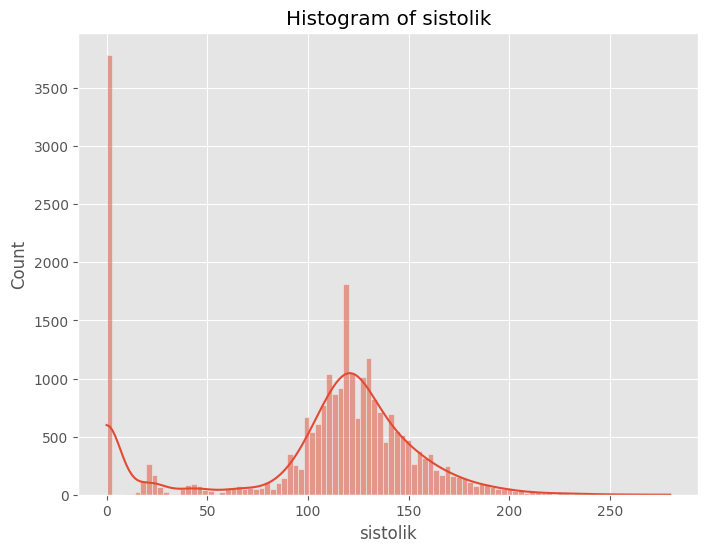

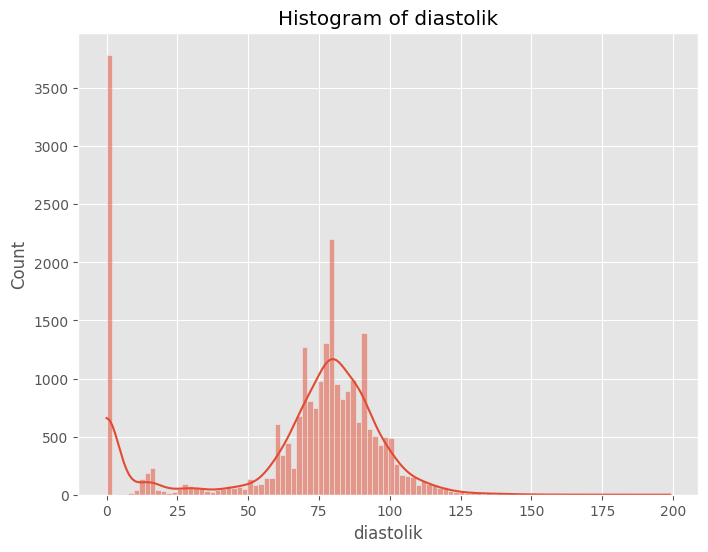

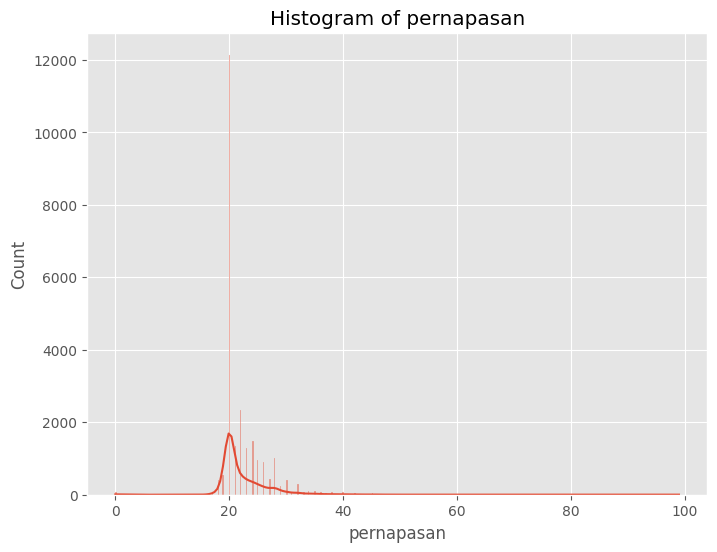

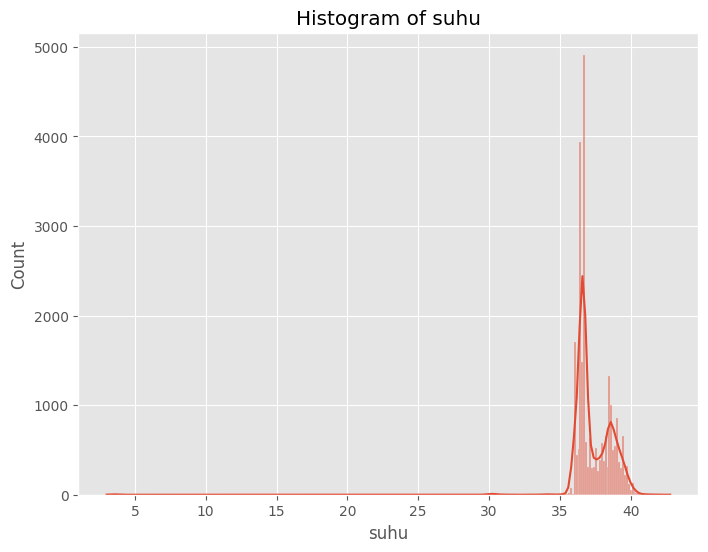

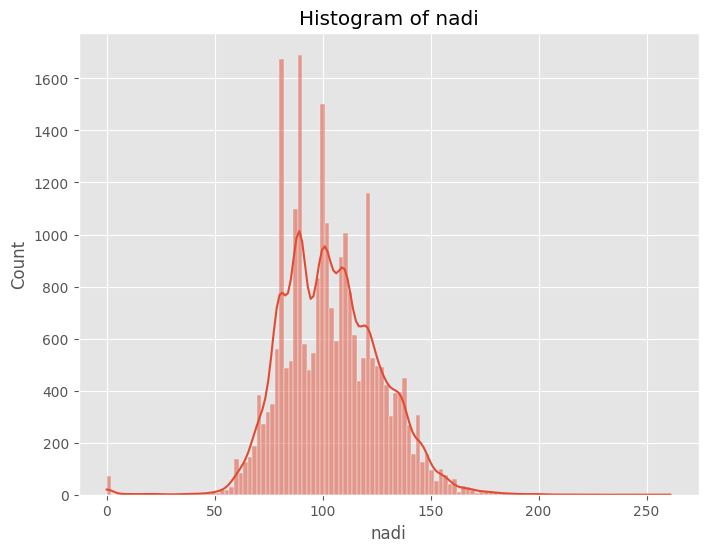

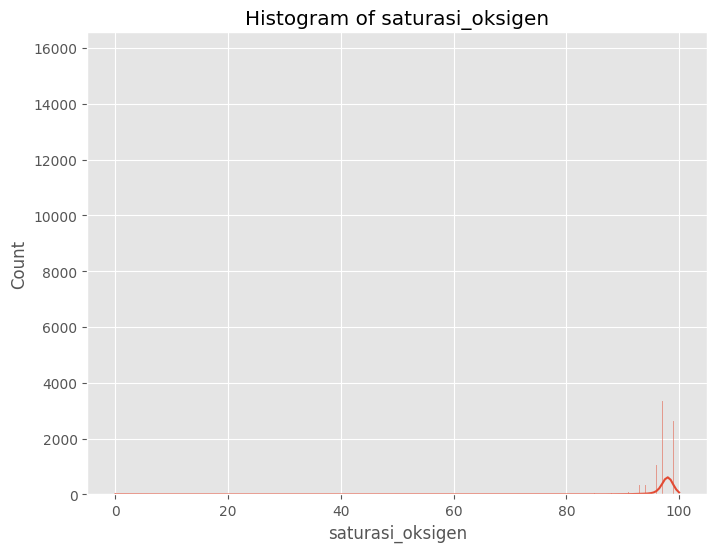

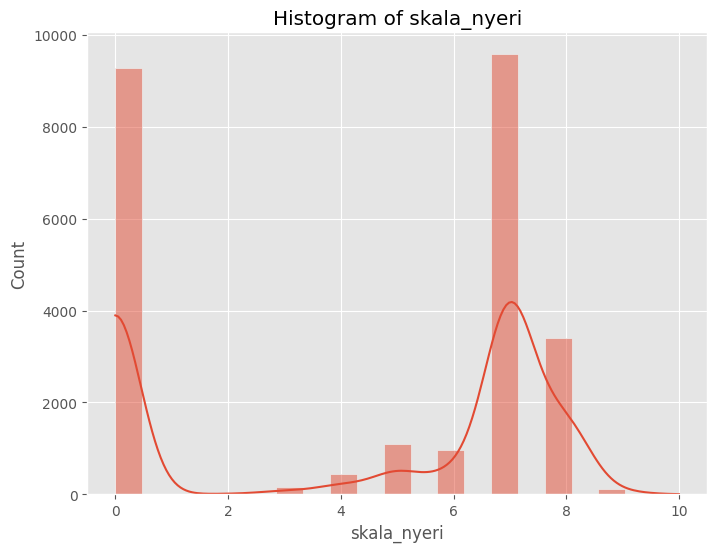

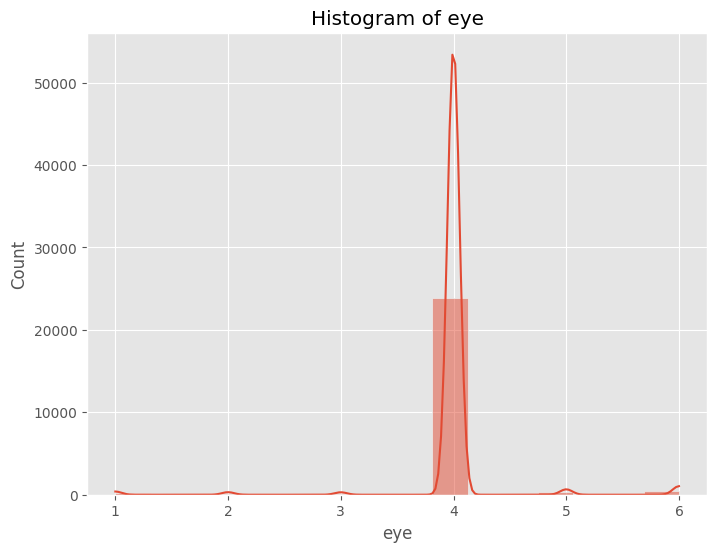

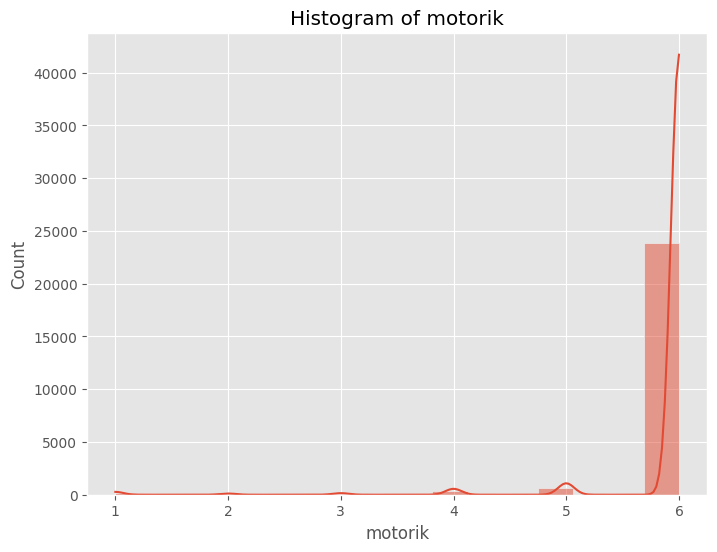

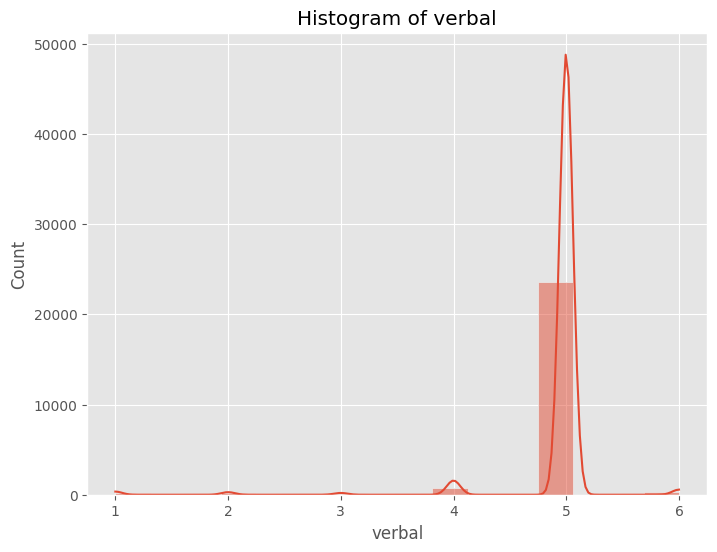

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in dfa_imputed.select_dtypes(include=np.number).columns:
   plt.figure(figsize=(8, 6))
   sns.histplot(dfa_imputed[column], kde=True)  # kde=True menambahkan kurva kepadatan kernel
   plt.title(f'Histogram of {column}')
   plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler

#scalerj = MinMaxScaler()
#df['WAKTU TUNGGU'] = scalerj.fit_transform(df[['WAKTU TUNGGU']])

scalerk = MinMaxScaler()
df['sistolik'] = scalerk.fit_transform(df[['sistolik']])
scalerl = MinMaxScaler()
df['diastolik'] = scalerl.fit_transform(df[['diastolik']])
scalerm = MinMaxScaler()
df['pernapasan'] = scalerm.fit_transform(df[['pernapasan']])
scalern = MinMaxScaler()
df['suhu'] = scalern.fit_transform(df[['suhu']])
scalero = MinMaxScaler()
df['nadi'] = scalero.fit_transform(df[['nadi']])
scalerp = MinMaxScaler()
df['saturasi_oksigen'] = scalerp.fit_transform(df[['saturasi_oksigen']])
scalerq = MinMaxScaler()
df['skala_nyeri'] = scalerq.fit_transform(df[['skala_nyeri']])
scalerr = MinMaxScaler()
#df['JAM TRIAGE'] = scalerr.fit_transform(df[['JAM TRIAGE']])
#scalers = MinMaxScaler()
#df['KESIMPULAN EMERGENSI'] = scalers.fit_transform(df[['KESIMPULAN EMERGENSI']])
scalert = MinMaxScaler()
df['KATEGORI UMUR'] = scalert.fit_transform(df[['KATEGORI UMUR']])
scaleru = MinMaxScaler()
df['STATUS JKN'] = scaleru.fit_transform(df[['STATUS JKN']])
scalerv = MinMaxScaler()
df['eye'] = scalerv.fit_transform(df[['eye']])
scalerw = MinMaxScaler()
df['motorik'] = scalerw.fit_transform(df[['motorik']])
scalerx = MinMaxScaler()
df['verbal'] = scalerx.fit_transform(df[['verbal']])

df.head(10)

,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,sistolik,diastolik,pernapasan,suhu,nadi,saturasi_oksigen,skala_nyeri,eye,motorik,verbal
0,0.625,0,0.0,1,0.403571,0.430052,0.222222,0.932161,0.502075,0.98,0.7,0.6,1.0,0.8
1,0.625,0,1.0,0,0.446429,0.362694,0.202020,0.841709,0.360996,0.99,0.7,0.6,1.0,0.8
2,0.875,1,1.0,0,0.500000,0.440415,0.202020,0.846734,0.398340,0.98,0.8,0.6,1.0,0.8
4,0.875,1,1.0,0,0.289286,0.310881,0.272727,0.841709,0.398340,0.98,0.7,0.6,1.0,0.8
5,0.750,1,1.0,0,0.517857,0.450777,0.222222,0.846734,0.298755,0.99,0.0,0.6,1.0,0.8
8,0.750,0,1.0,0,0.392857,0.362694,0.202020,0.846734,0.327801,0.97,0.7,0.6,1.0,0.8
12,1.000,0,0.0,0,0.607143,0.414508,0.202020,0.844221,0.406639,0.98,0.7,0.6,1.0,0.8
13,0.500,0,1.0,0,0.392857,0.362694,0.202020,0.902010,0.539419,0.97,0.7,0.6,1.0,0.8
15,0.750,0,1.0,0,0.396429,0.362694,0.202020,0.851759,0.390041,0.98,0.7,0.6,1.0,0.8
16,0.750,0,1.0,0,0.532143,0.569948,0.202020,0.846734,0.360996,0.97,0.7,0.6,1.0,0.8


In [43]:
from sklearn.preprocessing import MinMaxScaler

#scalerj = MinMaxScaler()
#dfa_imputed['WAKTU TUNGGU'] = scalerj.fit_transform(dfa_imputed[['WAKTU TUNGGU']])

scalerk = MinMaxScaler()
dfa_imputed['sistolik'] = scalerk.fit_transform(dfa_imputed[['sistolik']])
scalerl = MinMaxScaler()
dfa_imputed['diastolik'] = scalerl.fit_transform(dfa_imputed[['diastolik']])
scalerm = MinMaxScaler()
dfa_imputed['pernapasan'] = scalerm.fit_transform(dfa_imputed[['pernapasan']])
scalern = MinMaxScaler()
dfa_imputed['suhu'] = scalern.fit_transform(dfa_imputed[['suhu']])
scalero = MinMaxScaler()
dfa_imputed['nadi'] = scalero.fit_transform(dfa_imputed[['nadi']])
scalerp = MinMaxScaler()
dfa_imputed['saturasi_oksigen'] = scalerp.fit_transform(dfa_imputed[['saturasi_oksigen']])
scalerq = MinMaxScaler()
dfa_imputed['skala_nyeri'] = scalerq.fit_transform(dfa_imputed[['skala_nyeri']])
scalerr = MinMaxScaler()
#dfa_imputed['JAM TRIAGE'] = scalerr.fit_transform(dfa_imputed[['JAM TRIAGE']])
#scalers = MinMaxScaler()
#dfa_imputed['KESIMPULAN EMERGENSI'] = scalers.fit_transform(dfa_imputed[['KESIMPULAN EMERGENSI']])
scalert = MinMaxScaler()
dfa_imputed['KATEGORI UMUR'] = scalert.fit_transform(dfa_imputed[['KATEGORI UMUR']])
scaleru = MinMaxScaler()
dfa_imputed['STATUS JKN'] = scaleru.fit_transform(dfa_imputed[['STATUS JKN']])
scalerv = MinMaxScaler()
dfa_imputed['eye'] = scalerv.fit_transform(dfa_imputed[['eye']])
scalerw = MinMaxScaler()
dfa_imputed['motorik'] = scalerw.fit_transform(dfa_imputed[['motorik']])
scalerx = MinMaxScaler()
dfa_imputed['verbal'] = scalerx.fit_transform(dfa_imputed[['verbal']])

dfa_imputed.head(10)

,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,sistolik,diastolik,pernapasan,suhu,nadi,saturasi_oksigen,skala_nyeri,eye,motorik,verbal
0,0.625,0.0,0.0,1.0,0.403571,0.417085,0.222222,0.932161,0.463602,0.98,0.7,0.6,1.0,0.8
1,0.625,0.0,1.0,0.0,0.446429,0.351759,0.202020,0.841709,0.333333,0.99,0.7,0.6,1.0,0.8
2,0.875,1.0,1.0,0.0,0.500000,0.427136,0.202020,0.846734,0.367816,0.98,0.8,0.6,1.0,0.8
3,0.375,0.0,1.0,0.0,0.076429,0.078392,0.242424,0.907035,0.402299,0.98,0.0,0.6,1.0,0.8
4,0.875,1.0,1.0,0.0,0.289286,0.301508,0.272727,0.841709,0.367816,0.98,0.7,0.6,1.0,0.8
5,0.750,1.0,1.0,0.0,0.517857,0.437186,0.222222,0.846734,0.275862,0.99,0.0,0.6,1.0,0.8
6,0.375,1.0,1.0,0.0,0.000000,0.000000,0.232323,0.856784,0.478927,0.98,0.0,0.6,1.0,0.8
7,0.375,0.0,1.0,0.0,0.063571,0.066332,0.232323,0.831658,0.517241,0.98,0.7,0.6,1.0,0.8
8,0.750,0.0,1.0,0.0,0.392857,0.351759,0.202020,0.846734,0.302682,0.97,0.7,0.6,1.0,0.8
9,0.375,0.0,1.0,1.0,0.000000,0.000000,0.343434,0.841709,0.467433,0.96,0.0,0.6,1.0,0.8


In [44]:
df.dropna(inplace=True)
df.isnull().sum()

KATEGORI UMUR              0
JENIS KELAMIN              0
STATUS JKN                 0
Tindak Lanjut Akhir Igd    0
sistolik                   0
diastolik                  0
pernapasan                 0
suhu                       0
nadi                       0
saturasi_oksigen           0
skala_nyeri                0
eye                        0
motorik                    0
verbal                     0
dtype: int64

In [45]:
df.isnull().sum()

KATEGORI UMUR              0
JENIS KELAMIN              0
STATUS JKN                 0
Tindak Lanjut Akhir Igd    0
sistolik                   0
diastolik                  0
pernapasan                 0
suhu                       0
nadi                       0
saturasi_oksigen           0
skala_nyeri                0
eye                        0
motorik                    0
verbal                     0
dtype: int64

#SPLITTING DATA

In [46]:
y = df['Tindak Lanjut Akhir Igd']
X = df.drop('Tindak Lanjut Akhir Igd', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ya = dfa_imputed['Tindak Lanjut Akhir Igd']
Xa = dfa_imputed.drop('Tindak Lanjut Akhir Igd', axis=1)

Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.2, random_state=42)

Tanpa Imputer

In [47]:
df.shape

(19012, 14)

dengan k-NN Imputer

In [48]:
dfa_imputed.shape

(25054, 14)

In [49]:
X_train.head(10)

,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,sistolik,diastolik,pernapasan,suhu,nadi,saturasi_oksigen,skala_nyeri,eye,motorik,verbal
26274,0.625,1,1.0,0.421429,0.533679,0.323232,0.836683,0.435685,0.96,0.0,0.6,1.0,0.8
3479,0.500,1,0.0,0.360714,0.352332,0.333333,0.846734,0.497925,0.93,0.0,0.6,1.0,0.8
25532,0.625,0,1.0,0.389286,0.414508,0.202020,0.841709,0.423237,0.98,0.7,0.6,1.0,0.8
7964,0.625,0,1.0,0.385714,0.378238,0.202020,0.889447,0.302905,0.98,0.8,0.6,1.0,0.8
18244,0.625,0,1.0,0.500000,0.466321,0.202020,0.846734,0.460581,0.98,0.7,0.6,1.0,0.8
15758,0.875,0,1.0,0.453571,0.347150,0.202020,0.929648,0.497925,0.98,0.0,0.6,1.0,0.8
8571,0.750,1,1.0,0.457143,0.373057,0.202020,0.841709,0.294606,0.98,0.7,0.6,1.0,0.8
19315,0.750,0,1.0,0.339286,0.310881,0.202020,0.841709,0.419087,0.97,0.7,0.6,1.0,0.8
3397,0.625,1,0.0,0.582143,0.523316,0.212121,0.846734,0.323651,0.98,0.8,0.6,1.0,0.8
5903,0.875,0,1.0,0.517857,0.352332,0.202020,0.841709,0.348548,0.97,0.0,0.6,1.0,0.8


In [50]:
y_train.head(10)

26274    0
3479     0
25532    0
7964     0
18244    0
15758    0
8571     1
19315    0
3397     0
5903     1
Name: Tindak Lanjut Akhir Igd, dtype: int64

In [51]:
y_test.head(10)

17256    1
15018    1
19100    0
2357     1
13422    1
8249     1
14650    0
420      0
8224     0
6304     0
Name: Tindak Lanjut Akhir Igd, dtype: int64

In [52]:
X_shape = X.shape
y_shape = y.shape

print("Shape of X:", X_shape)
print("Shape of y:", y_shape)

Shape of X: (19012, 13)
Shape of y: (19012,)


#PEMODELAN DAN HASIL AKHIR DENGAN MLP BACKPROPAGATION

In [53]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(13, 5),
                         activation='relu', solver='adam', max_iter=5000, alpha=0.001,
                         learning_rate_init=0.001, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

mlpa = MLPClassifier(hidden_layer_sizes=(13, 5),
                         activation='relu', solver='adam', max_iter=5000, alpha=0.001,
                         learning_rate_init=0.001, random_state=42)
mlpa.fit(Xa_train, ya_train)
ya_pred = mlpa.predict(Xa_test)
accuracya = accuracy_score(ya_test, ya_pred)
print(f"Akurasi MLP tanpa imputer: {accuracy}")
print(f"Akurasi MLP dengan imputer: {accuracya}")

Akurasi MLP tanpa imputer: 0.6397580857217986
Akurasi MLP dengan imputer: 0.6192376771103573


In [54]:
from sklearn.metrics import accuracy_score

   # Prediksi pada data training dan testing
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

   # Hitung akurasi
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

ya_train_pred = mlpa.predict(Xa_train)
ya_test_pred = mlpa.predict(Xa_test)

   # Hitung akurasi
train_accuracya = accuracy_score(ya_train, ya_train_pred)
test_accuracya = accuracy_score(ya_test, ya_test_pred)

print(f"Train Accuracy Tanpa Imputer: {train_accuracy}")
print(f"Test Accuracy Tanpa Imputer: {test_accuracy}")
print(f"Train Accuracy Dengan Imputer: {train_accuracya}")
print(f"Test Accuracy Dengan Imputer: {test_accuracya}")

Train Accuracy Tanpa Imputer: 0.6477743441383391
Test Accuracy Tanpa Imputer: 0.6397580857217986
Train Accuracy Dengan Imputer: 0.6344858554108667
Test Accuracy Dengan Imputer: 0.6192376771103573


In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6397580857217986
              precision    recall  f1-score   support

           0       0.64      0.87      0.74      2221
           1       0.64      0.31      0.42      1582

    accuracy                           0.64      3803
   macro avg       0.64      0.59      0.58      3803
weighted avg       0.64      0.64      0.61      3803

[[1935  286]
 [1084  498]]


In [56]:
accuracya = accuracy_score(ya_test, ya_pred)
print(f"Accuracy: {accuracya}")
print(classification_report(ya_test, ya_pred))
print(confusion_matrix(ya_test, ya_pred))

Accuracy: 0.6192376771103573
              precision    recall  f1-score   support

         0.0       0.63      0.82      0.72      2911
         1.0       0.58      0.34      0.43      2100

    accuracy                           0.62      5011
   macro avg       0.61      0.58      0.57      5011
weighted avg       0.61      0.62      0.59      5011

[[2396  515]
 [1393  707]]


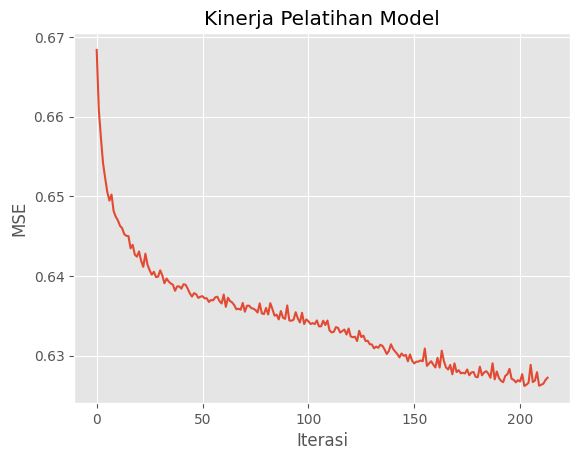

In [57]:
import matplotlib.pyplot as plt

# Dapatkan riwayat _loss_
loss_values = mlp.loss_curve_

# Plot _loss_ terhadap jumlah iterasi
plt.plot(loss_values)
plt.title('Kinerja Pelatihan Model')
plt.xlabel('Iterasi')
plt.ylabel('MSE')
plt.show()

In [58]:
# import pandas as pd
# import numpy as np
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# # ... (kode untuk optimasi MLP dengan PSO) ...

# # --- Decision Tree ---
# # Buat model Decision Tree
# dt_model = DecisionTreeClassifier(random_state=42)  # Kamu dapat menyesuaikan hyperparameter di sini

# # Latih model
# dt_model.fit(X_train, y_train)

# # Prediksi pada data testing
# dt_predictions = dt_model.predict(X_test)

# # Hitung akurasi
# dt_accuracy = accuracy_score(y_test, dt_predictions)
# print(f"Decision Tree Accuracy: {dt_accuracy}")

# # --- Model yang Akan Dicoba ---
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB

# # ... (Kode untuk optimasi MLP dengan PSO dan Decision Tree) ...

# # --- Logistic Regression ---
# lr_model = LogisticRegression(random_state=42)
# lr_model.fit(X_train, y_train)
# lr_predictions = lr_model.predict(X_test)
# lr_accuracy = accuracy_score(y_test, lr_predictions)
# print(f"Logistic Regression Accuracy: {lr_accuracy}")

# # --- Support Vector Machine (SVM) ---
# svm_model = SVC(random_state=42)
# svm_model.fit(X_train, y_train)
# svm_predictions = svm_model.predict(X_test)
# svm_accuracy = accuracy_score(y_test, svm_predictions)
# print(f"SVM Accuracy: {svm_accuracy}")

# # --- Random Forest ---
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)
# rf_predictions = rf_model.predict(X_test)
# rf_accuracy = accuracy_score(y_test, rf_predictions)
# print(f"Random Forest Accuracy: {rf_accuracy}")

# # --- K-Nearest Neighbors (KNN) ---
# knn_model = KNeighborsClassifier()
# knn_model.fit(X_train, y_train)
# knn_predictions = knn_model.predict(X_test)
# knn_accuracy = accuracy_score(y_test, knn_predictions)
# print(f"KNN Accuracy: {knn_accuracy}")

# # --- Naive Bayes ---
# nb_model = GaussianNB()
# nb_model.fit(X_train, y_train)
# nb_predictions = nb_model.predict(X_test)
# nb_accuracy = accuracy_score(y_test, nb_predictions)
# print(f"Naive Bayes Accuracy: {nb_accuracy}")

# --- Perbandingan Akurasi ---
print(f"\n--- Perbandingan Akurasi ---")
print(f"MLP Accuracy: {accuracy}")  # 'accuracy' dari kode optimasi MLP
# print(f"Decision Tree Accuracy: {dt_accuracy}")  # 'dt_accuracy' dari kode Decision Tree
# print(f"Logistic Regression Accuracy: {lr_accuracy}")
# print(f"SVM Accuracy: {svm_accuracy}")
# print(f"Random Forest Accuracy: {rf_accuracy}")
# print(f"KNN Accuracy: {knn_accuracy}")
# print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"MLP Accuracy dengan imputer: {accuracya}")


--- Perbandingan Akurasi ---
MLP Accuracy: 0.6397580857217986
MLP Accuracy dengan imputer: 0.6192376771103573


In [59]:
import pickle

# Simpan model MLP ke file
filename = 'modelMLP.sav'
pickle.dump(mlp, open(filename, 'wb'))